In [2]:
from torchvision.datasets import EMNIST, ImageFolder
from torchvision.transforms import ToTensor

In [3]:
emnist_train = EMNIST(root="./datasets/", split="balanced", train=True, transform=ToTensor())
emnist_test = EMNIST(root="./datasets/", split="balanced", train=False, transform=ToTensor())

In [4]:
dida = ImageFolder(root="./datasets/DIDA", transform=ToTensor())

In [5]:
cardis = ImageFolder(root="./datasets/CARDIS", transform=ToTensor())

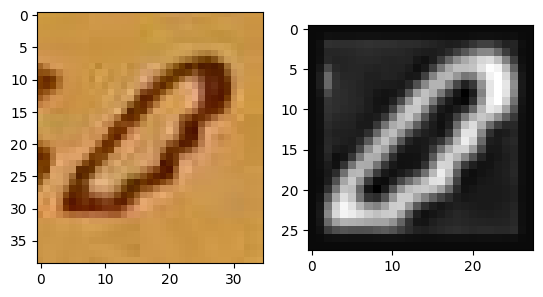

In [16]:
import transforms as ts
import matplotlib.pyplot as plt
from importlib import reload
reload(ts)

fig, (ax1, ax2) = plt.subplots(1, 2)

img = dida.__getitem__(15)[0].squeeze().numpy().transpose(1, 2, 0)
ax1.imshow(img, interpolation='nearest', cmap='grey')

img = ts.emnist_transform(img)
ax2.imshow(img.squeeze(), interpolation='nearest', cmap='grey')

plt.show()

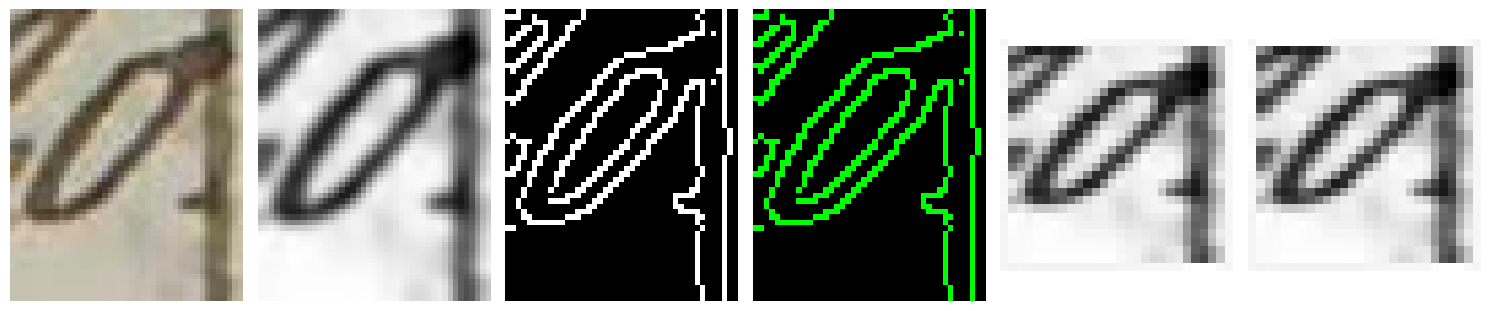

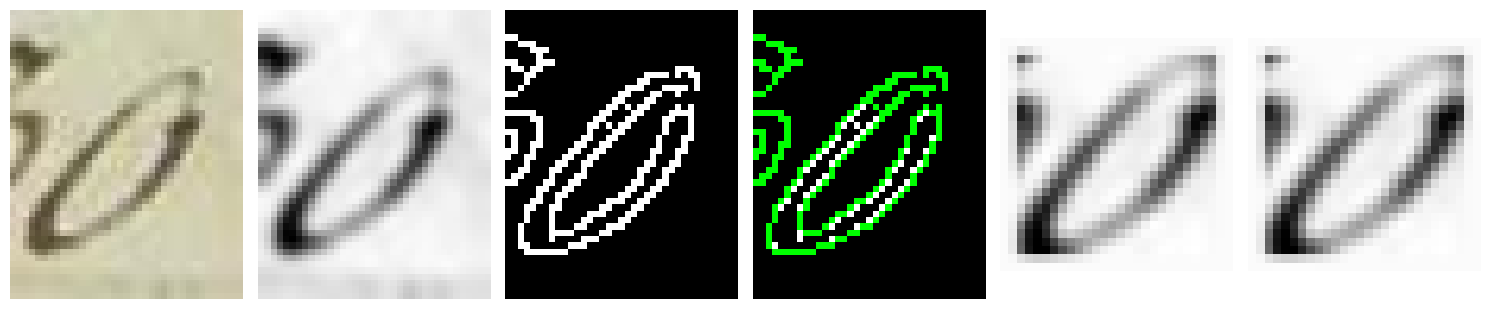

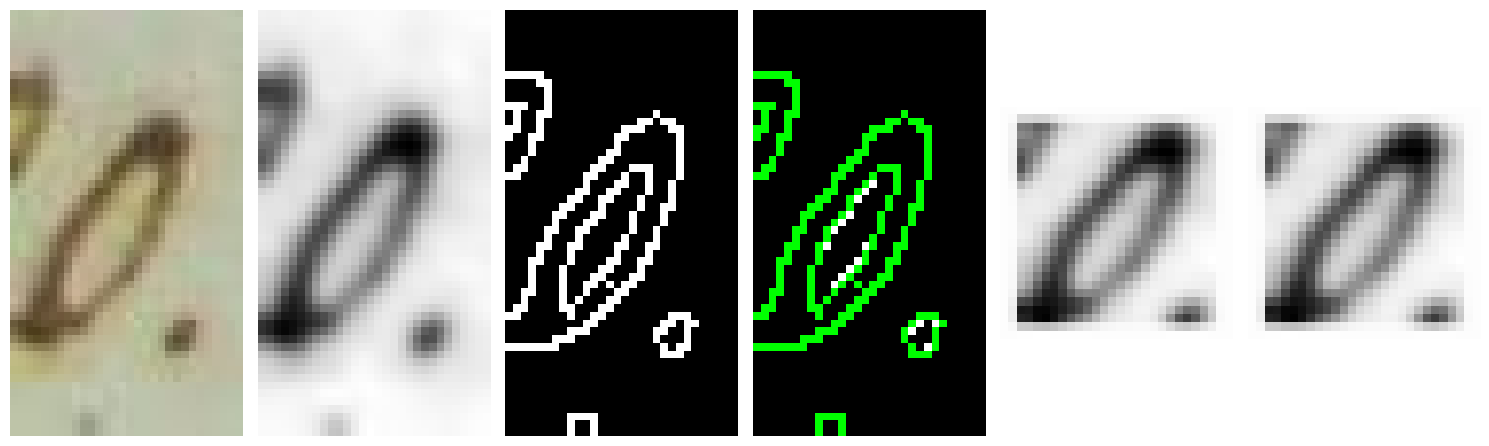

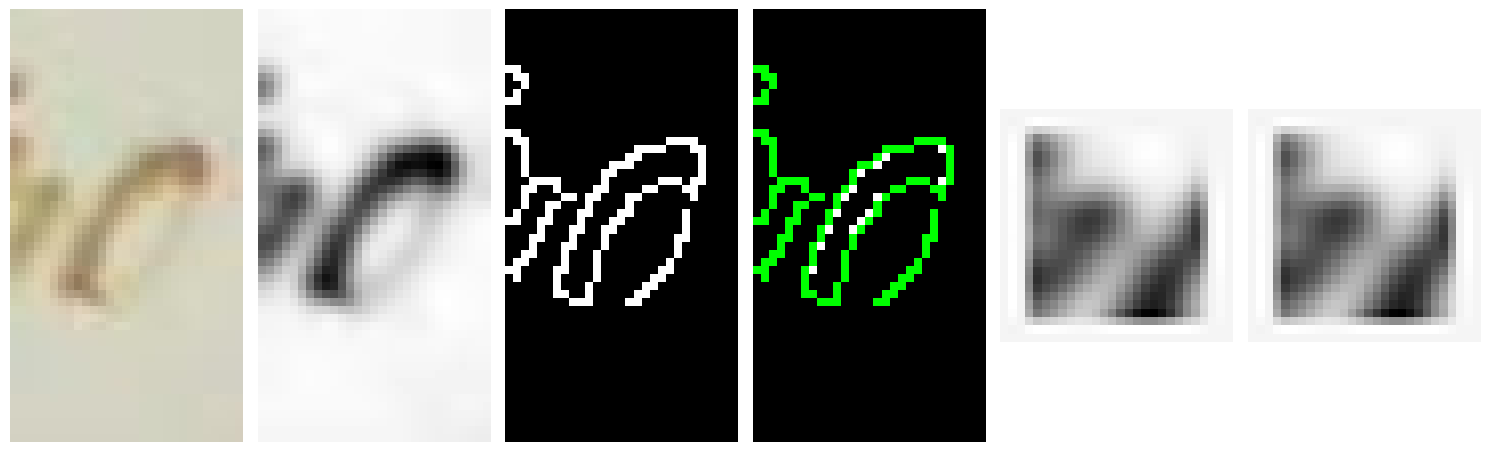

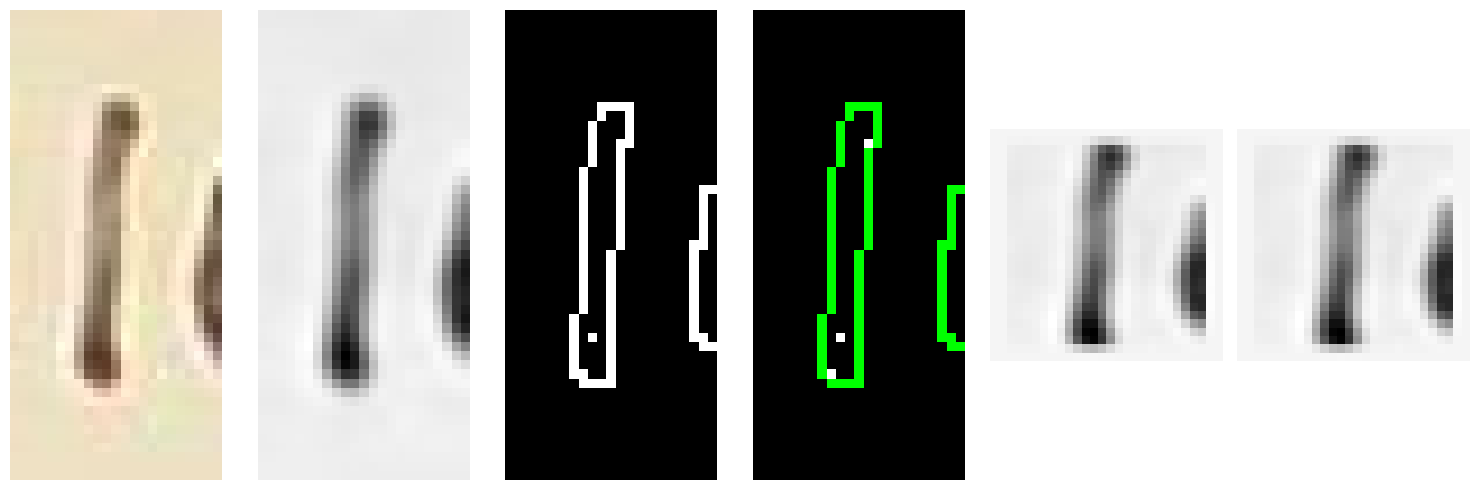

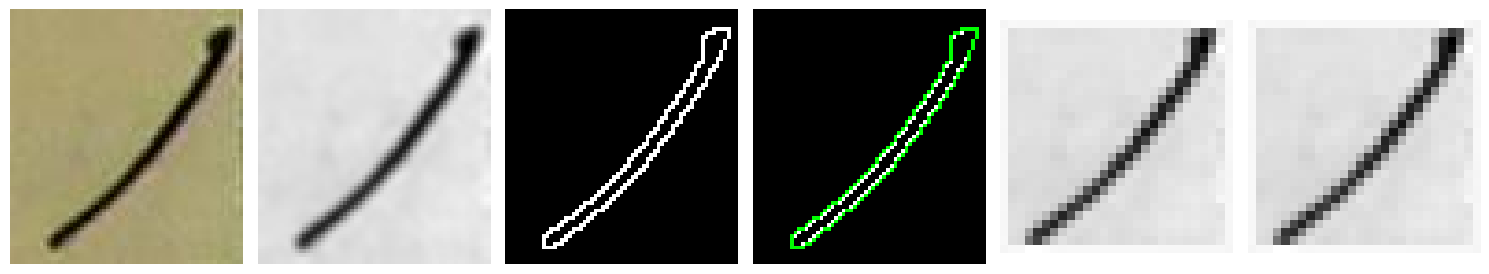

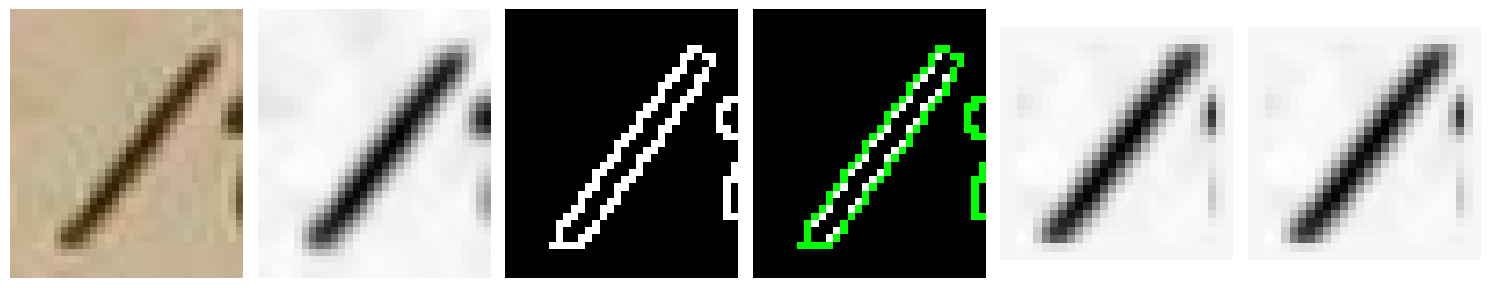

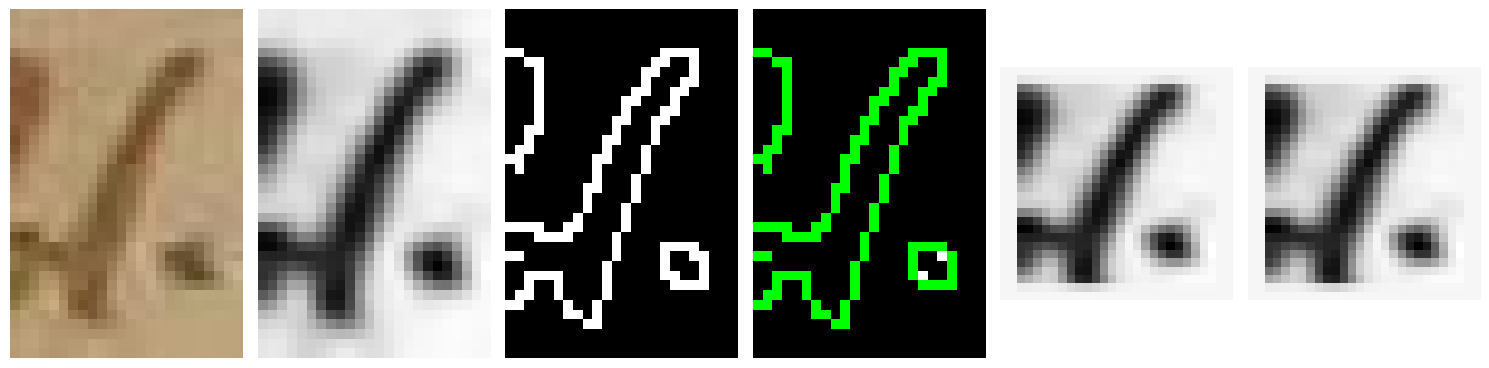

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import transforms as ts
from importlib import reload
reload(ts)


def preprocess_pipeline(dataset, roi: bool = True, invert: bool = True):

    label_counts = Counter(dataset.targets)

    for target_class in sorted(label_counts.keys()):

        filtered_indices = [i for i, label in enumerate(dataset.targets) if label == target_class]
        filtered_dataset = [(dataset[i][0], dataset.targets[i]) for i in filtered_indices]

        for i in range(4):

            img = filtered_dataset.__getitem__(i)[0].squeeze().numpy().transpose(1, 2, 0)
            transformed_img = ts.emnist_transform(img, roi, invert)
